# Abbey's Summer Data Collection Phase 1

Helpful Literature:
1. LNP936
2. https://pubs.acs.org/doi/pdf/10.1021/acs.jpca.8b04455
3. https://pubs.acs.org/doi/suppl/10.1021/acs.jpca.8b04455/suppl_file/jp8b04455_si_001.pdf
4. https://arxiv.org/pdf/1310.6059.pdf


In [1]:
%%time

# Third Party Imports
from sympy import *
from pylab import *
import matplotlib.pyplot as plt
import math

# Local Imports
from Regression import *

CPU times: user 1.63 s, sys: 376 ms, total: 2 s
Wall time: 2.34 s


In [2]:
%%time

# This function makes a pairing model basis of a given size with the
# same number of particles and holes.  The argument size must be an 
# even number with half of size also being even (i.e. 4, 8, 12, ...)
def make_general_basis (size):
    # There needs to be an even number of states
    assert size%2 == 0
    half = int(size/2)
    # There needs to be an even number of particles/holes
    assert half%2 == 0
    
    below_fermi = np.arange(half)
    print(below_fermi)
    below_fermi = tuple(below_fermi)
    
    above_fermi = np.arange(half, size)
    above_fermi = tuple(above_fermi)
    
    states = []
    for i in range (1, half+1):
        states.append((i, 1))
        states.append((i, -1))
        
    return below_fermi, above_fermi, states


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.3 µs


[0 1 2 3]


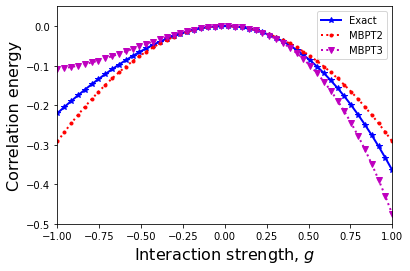

CPU times: user 1.31 s, sys: 74.1 ms, total: 1.39 s
Wall time: 1.43 s


In [3]:
%%time

# This is the LNP936 MBPT code with only a few changes.  Note that I did
# change the number of points generated from 20 to 50 to provide more data

# Make the basis (definite the single particle states below the fermi
# level, above the fermi level, and the labels for all the states)
below_fermi, above_fermi, states = make_general_basis(8)

# Define the symbol g, the interaction strength of the pairing model
g = Symbol('g')


def h0(p,q):
    if p == q:
        p1, s1 = states[p]
        return (p1 - 1)
    else:
        return 0

def f(p,q):
    if p == q:
        return 0
    s = h0(p,q)
    for i in below_fermi:
        s += assym(p,i,q,i)
        return s


def assym(p,q,r,s):
    p1, s1 = states[p]
    p2, s2 = states[q]
    p3, s3 = states[r]
    p4, s4 = states[s]

    if p1 != p2 or p3 != p4:
        return 0
    if s1 == s2 or s3 == s4:
        return 0
    if s1 == s3 and s2 == s4:
        return -g/2.
    if s1 == s4 and s2 == s3:
        return g/2.

def eps(holes, particles):
    E = 0
    for h in holes:
        p, s = states[h]
        E += (p-1)
    for p in particles:
        p, s = states[p]
        E -= (p-1)
    return E

temp_amps = []
# Diagram 1
# MBPT2 Diagram
s1 = 0
for a in above_fermi:
    for b in above_fermi:
        for i in below_fermi:
            for j in below_fermi:
                s1 += 0.25*assym(a,b,i,j)*assym(i,j,a,b)/eps((i,j),(a,b))
                # For each iteration append the amplitude to the list temp_amps
                temp_amps.append(assym(a,b,i,j)*assym(i, j, a, b)/eps((i,j),(a,b)))

# Diagram 3
s3 = 0
for a in above_fermi:
   for b in above_fermi:
       for c in above_fermi:
           for i in below_fermi:
               for j in below_fermi:
                   for k in below_fermi:
                       s3 += assym(i,j,a,b)*assym(a,c,j,k)*assym(b,k,c,i)/eps((i,j),(a,b))/eps((k,j),(a,c))

# Diagram 4
s4 = 0
for a in above_fermi:
    for b in above_fermi:
        for c in above_fermi:
            for d in above_fermi:
                for i in below_fermi:
                    for j in below_fermi:
                        s4 += 0.125*assym(i,j,a,b)*assym(a,b,c,d)*assym(c,d,i,j)/eps((i,j),(a,b))/eps((i,j),(c,d))

# Diagram 5
s5 = 0
for a in above_fermi:
    for b in above_fermi:
        for i in below_fermi:
            for j in below_fermi:
                for k in below_fermi:
                    for l in below_fermi:
                        s5 += 0.125*assym(i,j,a,b)*assym(k,l,i,j)*assym(a,b,k,l)/eps((i,j),(a,b))/eps((k,l),(a,b))

# Diagram 8 
s8 = 0
for a in above_fermi:
    for b in above_fermi:
        for i in below_fermi:
            for j in below_fermi:
                for k in below_fermi:
                    s8 -= 0.5*assym(i,j,a,b)*assym(a,b,i,k)*f(k,j)/eps((i,j),(a,b))/eps((i,k),(a,b))

# Diagram 9 
s9 = 0
for a in above_fermi:
    for b in above_fermi:
        for c in above_fermi:
            for i in below_fermi:
                for j in below_fermi:
                    s9 += 0.5*assym(i,j,a,b)*assym(a,c,i,j)*f(b,c)/eps((i,j),(a,b))/eps((i,j),(a,c))

ga = linspace(-1,1,50)
e1 = []
corr2 = []
corr3 = []
amps = []

for g_val in ga:
    H1 = matrix([[2-g_val , -g_val/2.,  -g_val/2., -g_val/2., -g_val/2.,     0],
                         [-g_val/2.,   4-g_val,  -g_val/2., -g_val/2.,    0., -g_val/2.],
                         [-g_val/2., -g_val/2.,    6-g_val,     0, -g_val/2., -g_val/2.],
                 [-g_val/2., -g_val/2.,      0,   6-g_val, -g_val/2., -g_val/2.],
                 [-g_val/2.,     0,  -g_val/2., -g_val/2.,   8-g_val, -g_val/2.],
                 [0    , -g_val/2.,  -g_val/2., -g_val/2., -g_val/2.,  10-g_val]])

    u1, v1 = linalg.eig(H1)
    e1.append(min(u1))
    corr2.append((s1).subs(g,g_val))
    corr3.append((s1+s3+s4+s5).subs(g,g_val))
    # Have to have an extra step here because the subs function does not
    # like zeros
    temp = []
    for i in temp_amps:
        if i == 0:
            temp.append(i)
        else:
            temp.append(i.subs(g, g_val))
    amps.append(temp)

exact = e1 - (2-ga)

plt.axis([-1,1,-0.5,0.05])
plt.xlabel(r'Interaction strength, $g$', fontsize=16)
plt.ylabel(r'Correlation energy', fontsize=16)
plt.plot(ga, exact,'b-*',linewidth = 2.0, label = 'Exact')
plt.plot(ga, corr2,'r:.', linewidth = 2.0, label = 'MBPT2')
plt.plot(ga, corr3, 'm:v',linewidth = 2.0, label = 'MBPT3')
plt.legend()
plt.savefig('perturbationtheory.pdf', format='pdf')
plt.show()


    

In [4]:
%%time

# This function just makes a very standard gaussian data set centered
# at mu and with a standard deviation of sigma.
def gaussian (x, mu, sigma):
    piece1 = (x-mu)**2
    piece2 = 2*sigma**2
    return math.exp(-piece1/piece2)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.06 µs


In [5]:
%%time

# This function corresponds to the function f in this paper:
# https://pubs.acs.org/doi/10.1021/acs.jpca.8b04455 (Eq. 5)
def f (dx, t, sigma):
    x = np.arange(-1, 1+dx, dx)
    v = []
    for i in x:
        v.append(gaussian(i, t, sigma))
    return np.asarray(v)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11 µs


In [6]:
%%time

# This function is Eq. 5 from the paper referenced above
def TATR (dx, amps, sigma):
    tatr = np.zeros(len(np.arange(-1, 1+dx, dx)))
    for amp in amps:
        tatr += f(dx, amp, sigma)
    return tatr

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


In [7]:
%%time

# A basic root mean squared function for error analysis
def rmse(predictions, targets):
    return math.sqrt(np.mean((predictions-targets)**2))

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 8.11 µs


In [8]:
%%time

# Define the sigma value of the Gaussian function f and then create
# the TATRs
sigmaT = 0.001
TATRs = []
dx = 0.01
X = 0
for amp in amps:
    TATRs.append(TATR(dx, amp, sigmaT))
Xdata = TATRs

CPU times: user 26 s, sys: 365 ms, total: 26.4 s
Wall time: 28.1 s


In [9]:
%%time

# Define the value of sigma to be used by the KRR algorithm and initialize
# the algorithm
sigma = 0.001
params1 = [sigma]
krr = KRR(params1, 'gaussian', alpha = 0.01)


Starting Kernel Ridge Regression


Setting kernel function to Gaussian.

CPU times: user 258 µs, sys: 116 µs, total: 374 µs
Wall time: 326 µs


In [10]:
%%time

# This code cell splits the data into training and test sets so
# that the test set will always come after the training set.
# This makes this into a extrapolation problem.

# Define the dividing point dim.  Points with an index less than dim will
# be the training set and points with an index greater than or equal to dim
# will be the test set
dim = 40
X_train = Xdata[:dim] 
X_test = Xdata[dim:] 
y_train = corr2[:dim] 
y_test = corr2[dim:]



CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 13.8 µs


In [11]:
%%time

# Fit the KRR model
krr.fit(X_train,y_train)



CPU times: user 252 ms, sys: 23.4 ms, total: 276 ms
Wall time: 161 ms


In [12]:
%%time

# Use the trained model to predict the test data set and report the RMSE
ytest = krr.predict(X_test)
print("******Test RMSE******", rmse(np.asarray(ytest), np.asarray(y_test)))
print("******Test MSE******", rmse(np.asarray(ytest), np.asarray(y_test))**2)



******Test RMSE****** 0.002040677978233584
******Test MSE****** 4.164366610847507e-06
CPU times: user 77.4 ms, sys: 9.21 ms, total: 86.6 ms
Wall time: 45.9 ms


CPU times: user 203 ms, sys: 13.4 ms, total: 217 ms
Wall time: 158 ms


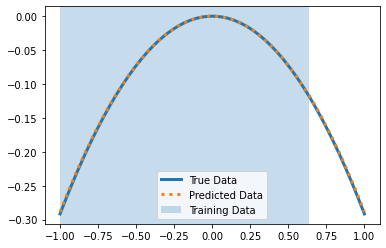

In [13]:
%%time

# Use the trained model to predict the whole data set and graph the results
ytest = krr.predict(Xdata)
plt.plot(ga, corr2, label='True Data', linewidth=3)
plt.plot(ga, ytest, ':', label='Predicted Data', linewidth=3)
plt.axvspan(ga[0], ga[dim], alpha=0.25, label='Training Data')
plt.legend()

# Your Mission
1. Starting with the four particle four hole pairing model perform hyperparameter tuning: find the values of sigmaT, sigma, dx, and alpha that give the lowest possible Test RMSE.  I would suggest doing this with nested for loops.  This may take a while!
2. Using the optimal parameters you found, increase the size of the pairing model (6p6h, 8p8h, ....) and see how this changes the results.  If you feel that more hyperparameter tuning is needed then do that as well.  Once you have a model working well, back off the size of the training set to as small as you can get it without the RMSE going over 0.01.  

Keep very detailed notes as to what you are trying, the results of what you are trying, and **time everything**.  Everytime you generate pairing model data or train the TATR/KRR model make sure you are timing how long that cell takes to run.  One of the things we want to know is if this comes with a time savings.

Once you have completed this notebook and have all of your data saved, let me know so I can send you phase 2!


Starting Kernel Ridge Regression


Setting kernel function to Gaussian.

******Test RMSE****** 0.0013677431171785087


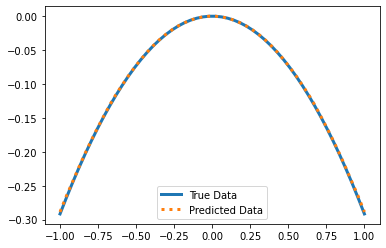

In [14]:
## IGNORE THIS FOR NOW

# This code cell randomly splits the data into training and test sets

# Define the sigma value of the Gaussian function f and then create
# the TATRs
sigmaT = 0.001
TATRs = []
dx = 0.01
X = 0
for amp in amps:
    TATRs.append(TATR(dx, amp, sigmaT))
Xdata = TATRs

# Define the value of sigma to be used by the KRR algorithm and initialize
# the algorithm
sigma = 0.001
params1 = [sigma]
krr = KRR(params1, 'gaussian', alpha = 0.01)

# Randomly split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xdata, corr2, test_size=0.2)

# Fit the KRR model
krr.fit(X_train,y_train)

# Use the trained model to predict the test data set and report the RMSE
ytest = krr.predict(X_test)
print("******Test RMSE******", rmse(np.asarray(ytest), np.asarray(y_test)))

# Use the trained model to predict the whole data set and graph the results
ytest = krr.predict(Xdata)
plt.plot(ga, corr2, label='True Data', linewidth=3)
plt.plot(ga, ytest, ':', label='Predicted Data', linewidth=3)
plt.legend()